<a href="https://colab.research.google.com/github/Blake2912/Vahini-Phase-1/blob/phase-2-path-finding/OurPath_Vahini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install osmnx networkx shapely

  Using cached osmnx-1.3.0-py3-none-any.whl (93 kB)
  Using cached networkx-3.0-py3-none-any.whl (2.0 MB)
  Using cached shapely-2.0.1-cp311-cp311-win_amd64.whl (1.4 MB)
  Using cached geopandas-0.12.2-py3-none-any.whl (1.1 MB)
  Using cached matplotlib-3.7.1-cp311-cp311-win_amd64.whl (7.6 MB)
     --------------------------------------- 14.8/14.8 MB 12.1 MB/s eta 0:00:00
  Using cached pandas-1.5.3-cp311-cp311-win_amd64.whl (10.3 MB)
  Using cached pyproj-3.4.1-cp311-cp311-win_amd64.whl (4.8 MB)
  Using cached requests-2.28.2-py3-none-any.whl (62 kB)
  Using cached Fiona-1.9.1-cp311-cp311-win_amd64.whl (21.9 MB)
  Using cached contourpy-1.0.7-cp311-cp311-win_amd64.whl (162 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.39.0-py3-none-any.whl (1.0 MB)
  Using cached kiwisolver-1.4.4-cp311-cp311-win_amd64.whl (55 kB)
  Using cached Pillow-9.4.0-cp311-cp311-win_amd64.whl (2.5 MB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached 


[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
import osmnx as ox
import networkx as nx
from shapely.geometry import Polygon

In [78]:
## Using boundbox

north, south, east, west = 12.96768338736144,12.965518842636625,77.71393642911939,77.71046157295785
# cmrit lat long bounds 0
# north (float) – northern latitude of bounding box: 12.96768338736144
# south (float) – southern latitude of bounding box: 12.965518842636625
# east (float) – eastern longitude of bounding box: 77.71393642911939
# west (float) – western longitude of bounding box: 77.71046157295785
network_type = 'all_private' # "all_private", "all", "bike", "drive", "drive_service", "walk"

G = ox.graph_from_bbox(
      north, south, east, west, 
      network_type=network_type, 
      simplify=True, 
      retain_all=False, 
      truncate_by_edge=False, 
      clean_periphery=True, 
      custom_filter=None)
# Create a graph from OSM within some bounding box.
def plot():
  # Plot a graph.
  fig, ax = ox.plot_graph(G)

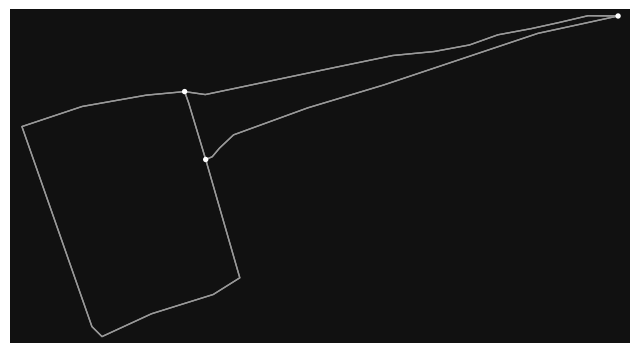

In [79]:
plot()

In [80]:
# Renaming the existing nodes in the graph
mapping = {3798918923:'cmrit_entrance',4159727902:'teacher_parking',4159727907:'volley_ball_court' }
G = nx.relabel_nodes(G, mapping)

In [81]:
# adding node basic_science and connecting it to the existing graph (from openstreet)
# Basic Science Node
G.add_node('basic_science',y= 12.96626, x=77.71211,street_count = 3) # we can add nodes like this..
# G.add_edge('teacher_parking','basic_science',length=300)
# G.add_edge('basic_science','teacher_parking',length=300) # Potential Fix for Issue-17
G.add_edges_from([('teacher_parking','basic_science'),('basic_science','teacher_parking')],length=300)

# Ganesh statue node
G.add_node('ganesha_statue',y=12.96598, x=77.71148, street_count=3)
# G.add_edge('basic_science','ganesha_statue',length=300)
# G.add_edge('ganesha_statue','basic_science',length=300) # Potential Fix for Issue-17
G.add_edges_from([('basic_science','ganesha_statue'),('ganesha_statue','basic_science')],length=300)

# Hostel Turn node
G.add_node('hostel_turn',y=12.96696, x=77.71111, street_count=3)
# G.add_edge('ganesha_statue','hostel_turn',length=300)
# G.add_edge('hostel_turn','ganesha_statue',length=300)
G.add_edges_from([('ganesha_statue','hostel_turn'),('hostel_turn','ganesha_statue')],length=300)
# G.add_edge('volley_ball_court','hostel_turn',length=300)
# G.add_edge('hostel_turn','volley_ball_court',length=300)
G.add_edges_from([('volley_ball_court','hostel_turn'),('hostel_turn','volley_ball_court')],length=300)

# NOTE:: After renaming of nodes use the relabled name and not the ID while creating new edges and nodes


[0, 0]

In [82]:
# nodes
[G.nodes[x] for x in G]

[{'y': 12.967455, 'x': 77.7139021, 'street_count': 3},
 {'y': 12.9667974, 'x': 77.711963, 'street_count': 3},
 {'y': 12.9671086, 'x': 77.7118638, 'street_count': 3},
 {'y': 12.96626, 'x': 77.71211, 'street_count': 3},
 {'y': 12.96598, 'x': 77.71148, 'street_count': 3},
 {'y': 12.96696, 'x': 77.71111, 'street_count': 3}]

In [83]:
G.edges 
# basic_science is ur new node, u can see that the 
# line between basic_science node  and the teachers-parking TURN node is darker 
# meaning -> addition of edge

OutMultiEdgeView([('cmrit_entrance', 'teacher_parking', 0), ('cmrit_entrance', 'volley_ball_court', 0), ('teacher_parking', 'volley_ball_court', 0), ('teacher_parking', 'volley_ball_court', 1), ('teacher_parking', 'cmrit_entrance', 0), ('teacher_parking', 'basic_science', 0), ('volley_ball_court', 'teacher_parking', 0), ('volley_ball_court', 'teacher_parking', 1), ('volley_ball_court', 'cmrit_entrance', 0), ('volley_ball_court', 'hostel_turn', 0), ('basic_science', 'teacher_parking', 0), ('basic_science', 'ganesha_statue', 0), ('ganesha_statue', 'basic_science', 0), ('ganesha_statue', 'hostel_turn', 0), ('hostel_turn', 'ganesha_statue', 0), ('hostel_turn', 'volley_ball_court', 0)])

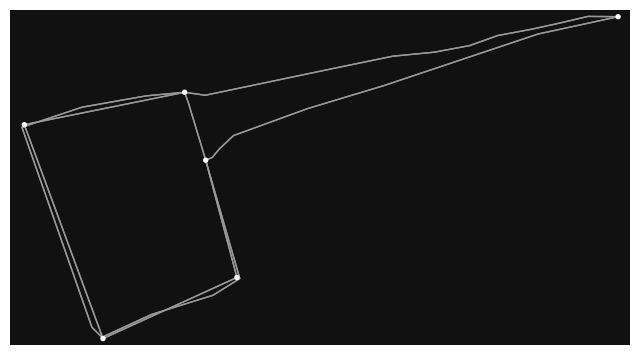

In [84]:
plot()

In [85]:
# finding shortest route
# start_latlng = (12.9671086,77.7118638)
# end_latlng = (12.966229089103756, 77.7121607793537)

# start_latlng = G['cmrit_entrance']
# end_latlng = G['basic_science']
optimizer = 'length'
# orig_node = ox.distance.nearest_nodes(G, start_latlng[1], start_latlng[0])
# find the nearest node to the end location
# dest_node = ox.distance.nearest_nodes(G, end_latlng[1], end_latlng[0])


orig_node = 'basic_science'
dest_node = 'hostel_turn'

#  find the shortest path
shortest_route = nx.shortest_path(G, orig_node, dest_node, weight=optimizer)

# print(shortest_route)
shortest_route_map = ox.plot_route_folium(G, shortest_route)
shortest_route_map

# # This saves it on html file to view it easily
# shortest_route_map.save('route.html')

In [86]:
[x for x in shortest_route] #printing of lat/long of the nodes in shortest_route

['basic_science', 'ganesha_statue', 'hostel_turn']

In [87]:
G.edges(data=True)

OutMultiEdgeDataView([('cmrit_entrance', 'teacher_parking', {'osmid': 414835003, 'highway': 'pedestrian', 'oneway': False, 'reversed': True, 'length': 224.51000000000002, 'geometry': <shapely.geometry.linestring.LineString object at 0x7fed950016d0>}), ('cmrit_entrance', 'volley_ball_court', {'osmid': 661967560, 'highway': 'residential', 'oneway': False, 'reversed': True, 'length': 225.35899999999998, 'geometry': <shapely.geometry.linestring.LineString object at 0x7fed95001460>}), ('teacher_parking', 'volley_ball_court', {'osmid': [414835002, 640540678], 'highway': 'pedestrian', 'oneway': False, 'reversed': False, 'length': 339.8109999999999, 'geometry': <shapely.geometry.linestring.LineString object at 0x7fed94888fa0>}), ('teacher_parking', 'volley_ball_court', {'osmid': 414835002, 'highway': 'pedestrian', 'oneway': False, 'reversed': True, 'length': 36.241, 'geometry': <shapely.geometry.linestring.LineString object at 0x7fed94888a30>}), ('teacher_parking', 'cmrit_entrance', {'osmid': 

In [88]:
# Script to test all path combinations in the given nodes
path_dict = {}
nodes = tuple(G.nodes)
for i in nodes:
    for j in nodes:
        if i != j:
           path_dict[str(i)+" to "+str(j)] = nx.shortest_path(G, i, j, weight=optimizer) 
from pprint import pprint
pprint(path_dict)

{'basic_science to cmrit_entrance': ['basic_science',
                                     'teacher_parking',
                                     'cmrit_entrance'],
 'basic_science to ganesha_statue': ['basic_science', 'ganesha_statue'],
 'basic_science to hostel_turn': ['basic_science',
                                  'ganesha_statue',
                                  'hostel_turn'],
 'basic_science to teacher_parking': ['basic_science', 'teacher_parking'],
 'basic_science to volley_ball_court': ['basic_science',
                                        'teacher_parking',
                                        'volley_ball_court'],
 'cmrit_entrance to basic_science': ['cmrit_entrance',
                                     'teacher_parking',
                                     'basic_science'],
 'cmrit_entrance to ganesha_statue': ['cmrit_entrance',
                                      'teacher_parking',
                                      'basic_science',
                     